Guess how many clusters of sweets there are (2-6 recommended):  3


C:\Users\gd192\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gd192\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



The computer grouped the sweets into 3 clusters!
Silhouette Score (clustering quality): 0.41


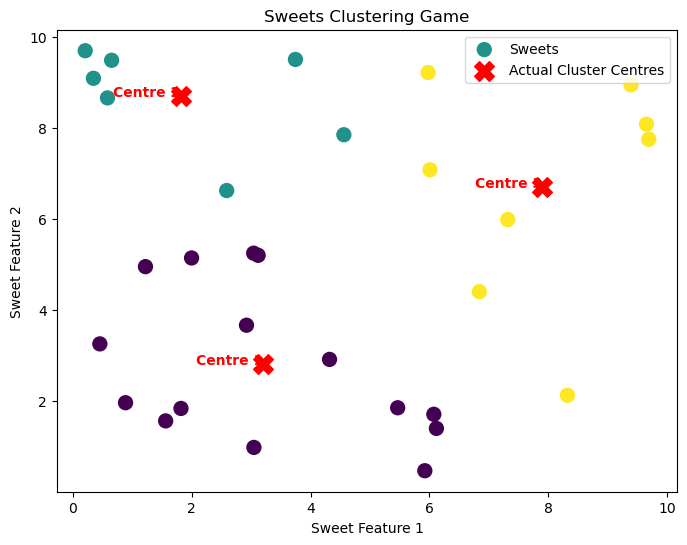

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate random sweets (as points in 2D space)
np.random.seed(42)
sweets = np.random.rand(30, 2) * 10  # 30 sweets in 2D space

# Suggest a reasonable range for clusters
suggested_min = 2
suggested_max = min(6, len(sweets) // 5)  # Keep it reasonable based on data size

# Get player's guess with validation
while True:
    try:
        player_guess = int(input(f"Guess how many clusters of sweets there are ({suggested_min}-{suggested_max} recommended): "))
        if suggested_min <= player_guess <= suggested_max:
            break  # Valid input
        else:
            print(f"Please enter a number between {suggested_min} and {suggested_max}.")
    except ValueError:
        print("Invalid input. Please enter a number.")

# Train K-Means Clustering model with player's guess
kmeans_player = KMeans(n_clusters=player_guess, random_state=42)
kmeans_player.fit(sweets)
labels_player = kmeans_player.labels_

# Train K-Means Clustering model with the true number of clusters
true_clusters = 3  # Actual number of clusters
kmeans_true = KMeans(n_clusters=true_clusters, random_state=42)
kmeans_true.fit(sweets)
labels_true = kmeans_true.labels_

# Calculate silhouette score for quality assessment
silhouette_avg = silhouette_score(sweets, labels_true)

# Show Results
print("\nThe computer grouped the sweets into", true_clusters, "clusters!")
print(f"Silhouette Score (clustering quality): {silhouette_avg:.2f}")

# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot sweets clustered by the computer
plt.scatter(sweets[:, 0], sweets[:, 1], c=labels_true, cmap='viridis', s=100, label="Sweets")

# Plot actual cluster centres
plt.scatter(kmeans_true.cluster_centers_[:, 0], kmeans_true.cluster_centers_[:, 1], 
            color='red', marker='X', s=200, label="Actual Cluster Centres")

# Add labels to cluster centres
for i, (x, y) in enumerate(kmeans_true.cluster_centers_):
    plt.text(x, y, f'Centre {i+1}', fontsize=10, ha='right', color='red', fontweight='bold')

# Titles and labels
plt.title("Sweets Clustering Game")
plt.xlabel("Sweet Feature 1")
plt.ylabel("Sweet Feature 2")
plt.legend()

# Save the plot as an image
plt.savefig("sweets_clustering.png")

# Show plot
plt.show()